# NLP 기초 Assignment
## NLP 제대로 맛보기 - spam.csv를 가지고 유의미한 해석을 도출해주세요!

In [3]:
# 필요한 모듈 불러오기
import pandas as pd

## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다. 물론 8주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고, 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다 :)

In [4]:
spam = pd.read_csv('spam.csv')

In [5]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [6]:
spam

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Tokenizing
- 실습코드에서는 한국어 대상이라 konlpy를 다뤘지만, 영어는 nltk 모듈을 쓸 수 있습니다. 의미 있는 토큰으로 쪼개고 불용어도 처리해보세요! 현존하는 불용어 리스트를 사용해도 좋고, 새롭게 만들어도 좋습니다. 특수문자는 없애주고, 모두 소문자로 변환해주는 전처리도 필요하겠죠?

In [7]:
import nltk

In [8]:
# 예시 코드 코드
from nltk.tokenize import word_tokenize
nltk.download('punkt')
text = spam.iloc[5]['v2'].lower() # 소문자로 통일시켜주었다.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [9]:
tokens_word = word_tokenize(text)
print(tokens_word)

['freemsg', 'hey', 'there', 'darling', 'it', "'s", 'been', '3', 'week', "'s", 'now', 'and', 'no', 'word', 'back', '!', 'i', "'d", 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', '?', 'tb', 'ok', '!', 'xxx', 'std', 'chgs', 'to', 'send', ',', 'å£1.50', 'to', 'rcv']


In [10]:
from nltk.tokenize import RegexpTokenizer

t = RegexpTokenizer("[\w]+") # 알파벳이나 숫자 부분만을 뽑아낸다.
tokens = t.tokenize(text) 
print(tokens)

['freemsg', 'hey', 'there', 'darling', 'it', 's', 'been', '3', 'week', 's', 'now', 'and', 'no', 'word', 'back', 'i', 'd', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'to', 'send', 'å', '1', '50', 'to', 'rcv']


마침표나 물음표와 같은 문장기호나 일부 특수문자는 제거되었지만 여전히 å와 같은 특수문자가 남아있다. 

In [11]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
tokens_tree = tokenizer.tokenize(text)
print(tokens_tree)

['freemsg', 'hey', 'there', 'darling', 'it', "'s", 'been', '3', 'week', "'s", 'now', 'and', 'no', 'word', 'back', '!', 'i', "'d", 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', '?', 'tb', 'ok', '!', 'xxx', 'std', 'chgs', 'to', 'send', ',', 'å£1.50', 'to', 'rcv']


앞선 word Tockenizer와 큰 차이가 없어 특수문자를 제거하고 word tokenizer를 사용하고자 한다.

In [12]:
import re
texts = re.sub('[^a-z0-9]', ' ', text) # 알파벳이나 숫자가 아닌 문자를 제거한다.
word_tokens = word_tokenize(texts)
print(word_tokens)

['freemsg', 'hey', 'there', 'darling', 'it', 's', 'been', '3', 'week', 's', 'now', 'and', 'no', 'word', 'back', 'i', 'd', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'to', 'send', '1', '50', 'to', 'rcv']


In [13]:
nltk.download('stopwords')
from nltk.corpus import stopwords

eng_stops = set(stopwords.words('english'))
print(eng_stops)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'once', 'most', "don't", "mightn't", 'yourselves', 'here', 'have', 'during', 'down', "it's", 'same', 'his', 'am', 'does', "hadn't", 'not', 'only', "doesn't", "weren't", 'wouldn', 'their', 'whom', 'as', 'ours', 'hers', 'aren', 'between', "hasn't", 'more', 'with', "mustn't", 'own', 'did', 'they', 'isn', 'because', 'yourself', 'an', 'will', "isn't", 'its', 'ourselves', 'just', 'll', "wouldn't", "you'd", 'this', 'shouldn', 'itself', "shouldn't", 'off', 'very', 'if', "aren't", 'above', 'so', 'to', 'who', 'no', "you're", 't', "she's", "couldn't", 'the', "didn't", 'some', 'are', 'before', "shan't", 'didn', 'below', 'mightn', 'about', "you'll", 'these', 'in', 'nor', "won't", 'weren', 'your', 'hasn', 'wasn', 'such', 'himself', 'had', 'until', 'm', 'do', 'theirs', 'them', 'when', 'it', 'our', 'has', 'both', "needn't", 'further', 'that', 'my', "that'll", 'we', 'which', 'i', 'too', 'need

nltk 라이브러리에서 제공하는 stopwords는 위와 같다. 위의 단어들은 문맥을 분석할 때, 큰 영향을 미치지 않기 때문에 제거해주도록 한다.

In [14]:
tokens_stopwords = [word for word in word_tokens if word not in eng_stops and not word.isdigit() and len(word)> 1]
print(tokens_stopwords)

['freemsg', 'hey', 'darling', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'rcv']


stopwords에 포함된 단어가 아니고, 숫자가 아니고, 글자수가 2개 이상인 경우만 token에 포함되도록 한다.

In [15]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()

tokens_lm = [lm.lemmatize(w) for w in tokens_stopwords]
print(tokens_lm)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
['freemsg', 'hey', 'darling', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'rcv']


Lemmatizer를 사용하여 단어를 사전형으로 통일시켜준다.

In [16]:
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag
print(pos_tag(tokens_lm))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[('freemsg', 'NN'), ('hey', 'NN'), ('darling', 'VBG'), ('week', 'NN'), ('word', 'NN'), ('back', 'RB'), ('like', 'IN'), ('fun', 'NN'), ('still', 'RB'), ('tb', 'VBZ'), ('ok', 'JJ'), ('xxx', 'NNP'), ('std', 'NN'), ('chgs', 'NN'), ('send', 'VBP'), ('rcv', 'NN')]


단어의 품사를 붙이는 pos tagging을 해보았다. 각각의 단어와 품사를 담고 있는 튜플 형태로 변환이 되었다. 대표적으로 사용되는 품사들은 아래와 같다.
* NNP: 단수 고유명사
* VB: 동사
* VBP: 동사 현재형
* TO: to 전치사
* NN: 명사(단수형 혹은 집합형)
* DT: 관형사

In [42]:
def make_corpus(df, tokenizer, stopWords, pos_tagging = True):
    corpus = []
    for line in df['v2']:
        text = re.sub('[^a-z0-9]', ' ', line.lower())
        if tokenizer == 'word':
            tokens = word_tokenize(text)
        else:
            tokens = tokenizer.tokenize(text)  # 소문자로 바꾼 후 tokenize한다.
        tokens_stop = [word for word in tokens if word not in eng_stops and not word.isdigit() and len(word) > 1] # stopword에 있는 토큰들은 제거한다.
        tokens_lm = [lm.lemmatize(w) for w in tokens_stop] # 토큰들을 lemmatize한다.
        if pos_tagging:
            corpus.append(['/'.join(p) for p in pos_tag(tokens_lm)]) # 토큰들에 pos tagging을 한다.
        else:
            corpus.append(tokens_lm)
    return corpus

corpus = make_corpus(df = spam, tokenizer = 'word', stopWords = eng_stops, pos_tagging = False)
print(corpus)

[['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'great', 'world', 'la', 'buffet', 'cine', 'got', 'amore', 'wat'], ['ok', 'lar', 'joking', 'wif', 'oni'], ['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'apply', '08452810075over18'], ['dun', 'say', 'early', 'hor', 'already', 'say'], ['nah', 'think', 'go', 'usf', 'life', 'around', 'though'], ['freemsg', 'hey', 'darling', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'rcv'], ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent'], ['per', 'request', 'melle', 'melle', 'oru', 'minnaminunginte', 'nurungu', 'vettam', 'set', 'callertune', 'caller', 'press', 'copy', 'friend', 'callertune'], ['winner', 'valued', 'network', 'customer', 'selected', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', 'hour'], ['mobile', 'month', 'entitled', 'updat

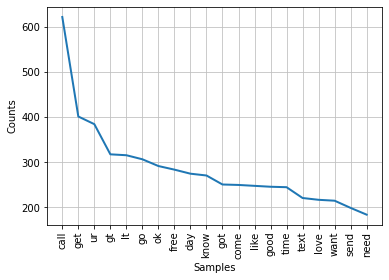

In [18]:
corpus_flatten = [element for array in corpus for element in array]
# print(corpus_flatten)
from nltk import Text
from matplotlib import pyplot as plt
text = Text(corpus_flatten)
text.plot(20)
plt.show()

token을 빈도수대로 정렬한 결과를 시각화하였다. call이 압도적으로 가장 많이 등장하였고, 뒤를 이어 get, ur, gt 등이 등장하였다. 

## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText가 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

In [19]:
from gensim.models import Word2Vec, FastText

In [29]:
# 참고 https://stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g
def plot_model(model, title='Untitled'):
    # 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
    mpl.rcParams['axes.unicode_minus'] = False

    vocab = list(model.wv.vocab)
    X = model[vocab]

    # print(len(X))
    # print(X[0][:10])
    tsne = TSNE(n_components=2)

    # 100개의 단어에 대해서만 시각화
    X_tsne = tsne.fit_transform(X[:100,:])
    # X_tsne = tsne.fit_transform(X)

    df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
    fig = plt.figure()
    fig.set_size_inches(40, 20)
    ax = fig.add_subplot(1, 1, 1)

    ax.scatter(df['x'], df['y'])

    for word, pos in df.iterrows():
        ax.annotate(word, pos, fontsize=25)
    plt.title("<{}>".format(title), size = 40)
    plt.show()

### 1) Skip Gram

In [20]:
%time skipGram = Word2Vec(corpus, size=30, window=5, min_count=10, workers=8, iter=100, sg=1)

CPU times: user 23.2 s, sys: 184 ms, total: 23.4 s
Wall time: 12.7 s


In [21]:
skipGram.most_similar("good", topn = 5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('morning', 0.8338953256607056),
 ('hope', 0.7709232568740845),
 ('princess', 0.6880741119384766),
 ('great', 0.6876217126846313),
 ('sweet', 0.6843323707580566)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


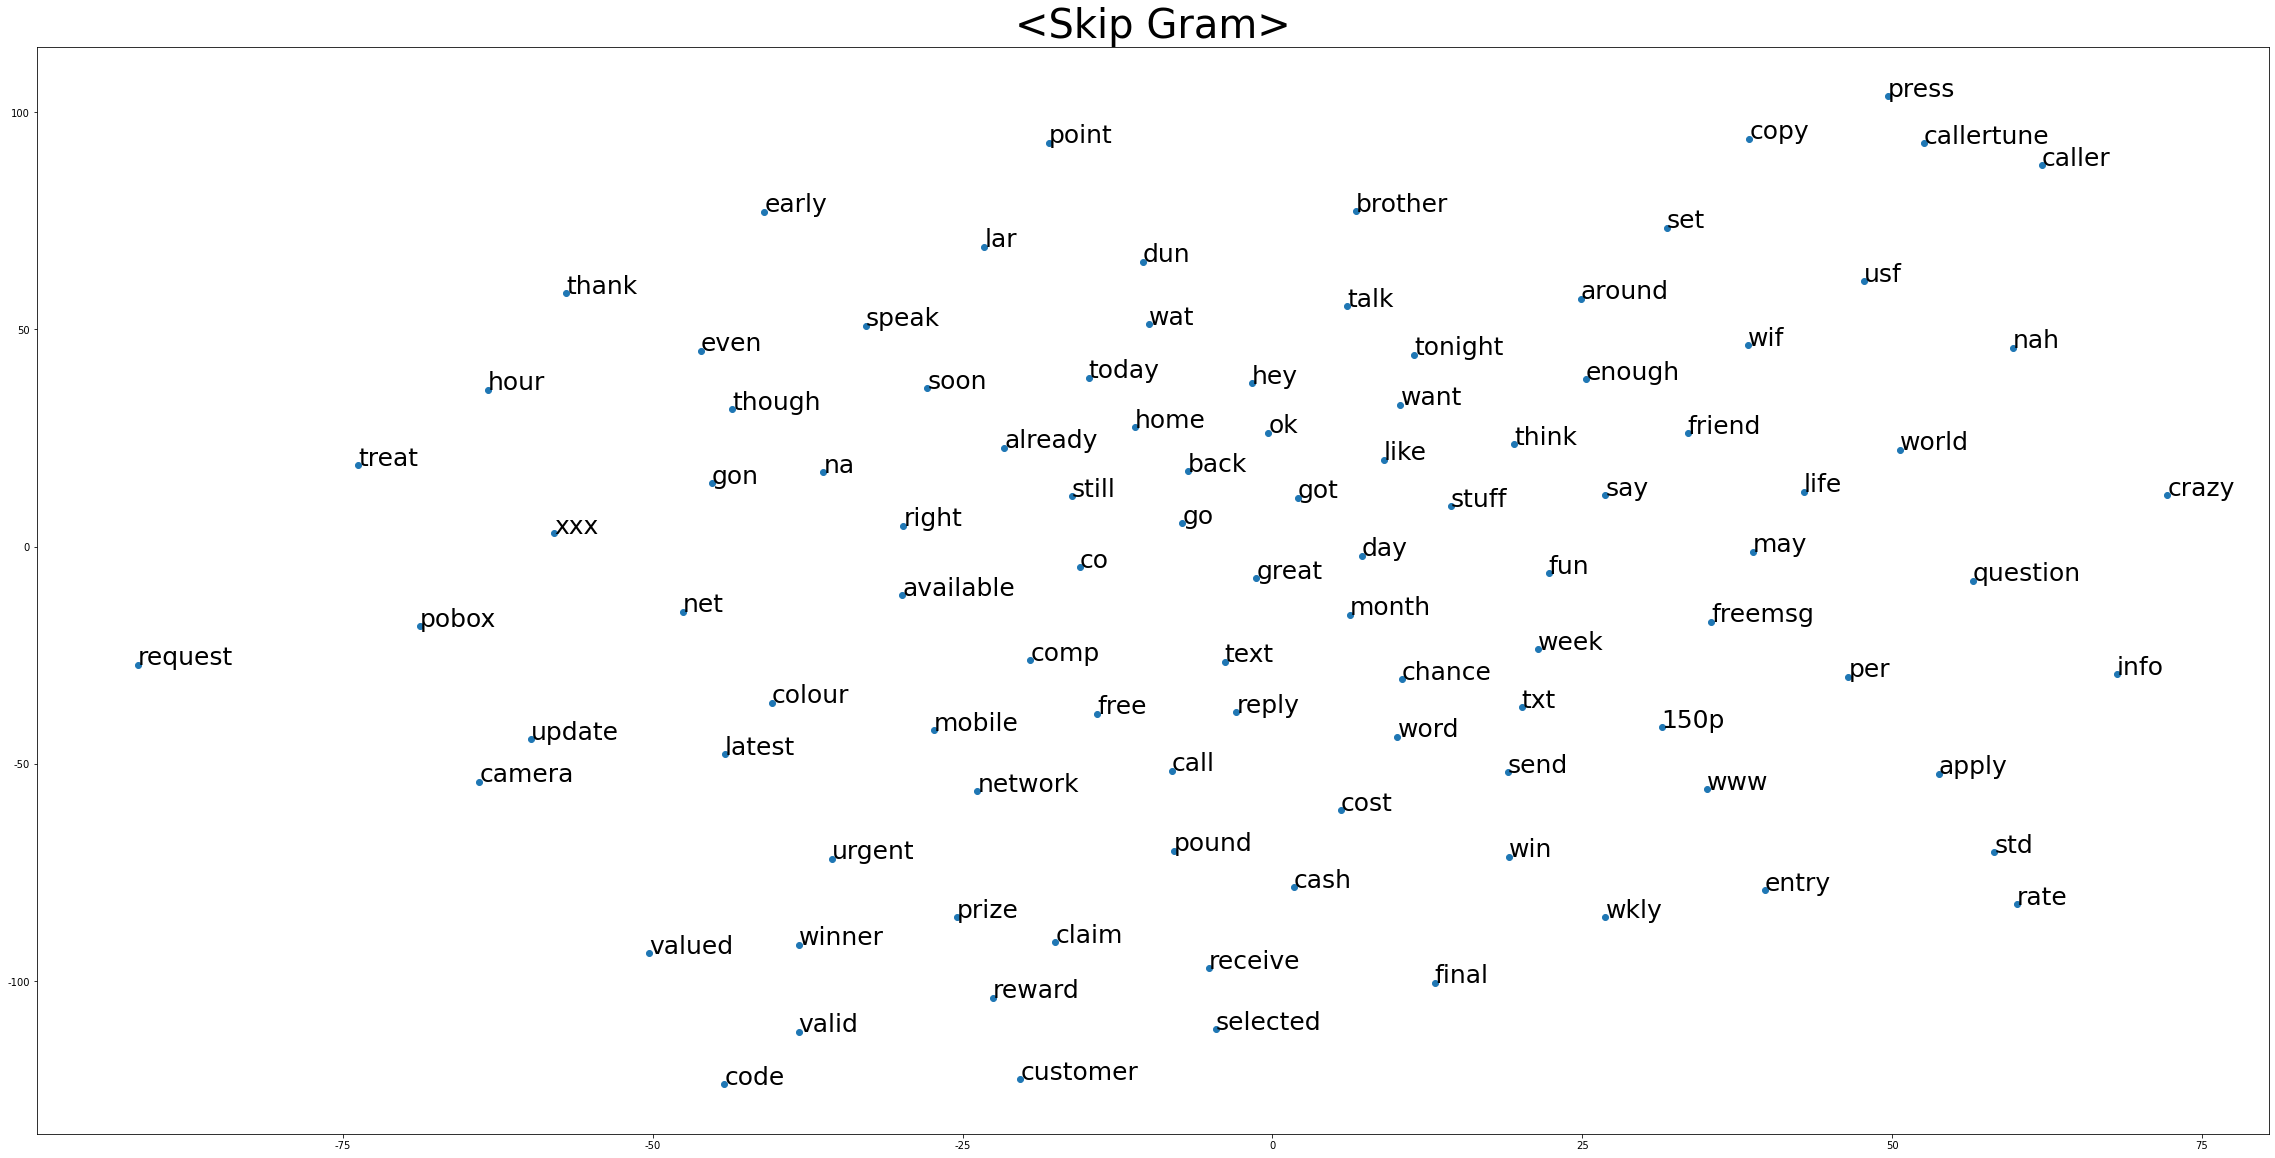

In [30]:
plot_model(skipGram, title = 'Skip Gram')

good과 유사한 단어들 상위 5개를 추출한 결과, morning, hope, princess, great, sweet 등 good과 함께 쓰이거나 뜻이 유사한 긍정적인 단어들을 얻을 수 있었다. 또한 임베딩 결과를 시각화한 결과, (day, month), (mobile, network), (winner, prize)와 주로 같이 의미가 유사하거나 함께 등장하는 단어가 가깝게 위치하는 것을 확인할 수 있었다.

### 2) CBOW

In [22]:
%time Cbow = Word2Vec(corpus, size = 30, window=5, min_count=10,  workers=8, sg=0, iter=100)

CPU times: user 9.8 s, sys: 278 ms, total: 10.1 s
Wall time: 5.84 s


In [23]:
Cbow.most_similar("good", topn = 5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('great', 0.6029861569404602),
 ('hope', 0.5888976454734802),
 ('another', 0.5653778314590454),
 ('morning', 0.560457706451416),
 ('moment', 0.5413091778755188)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


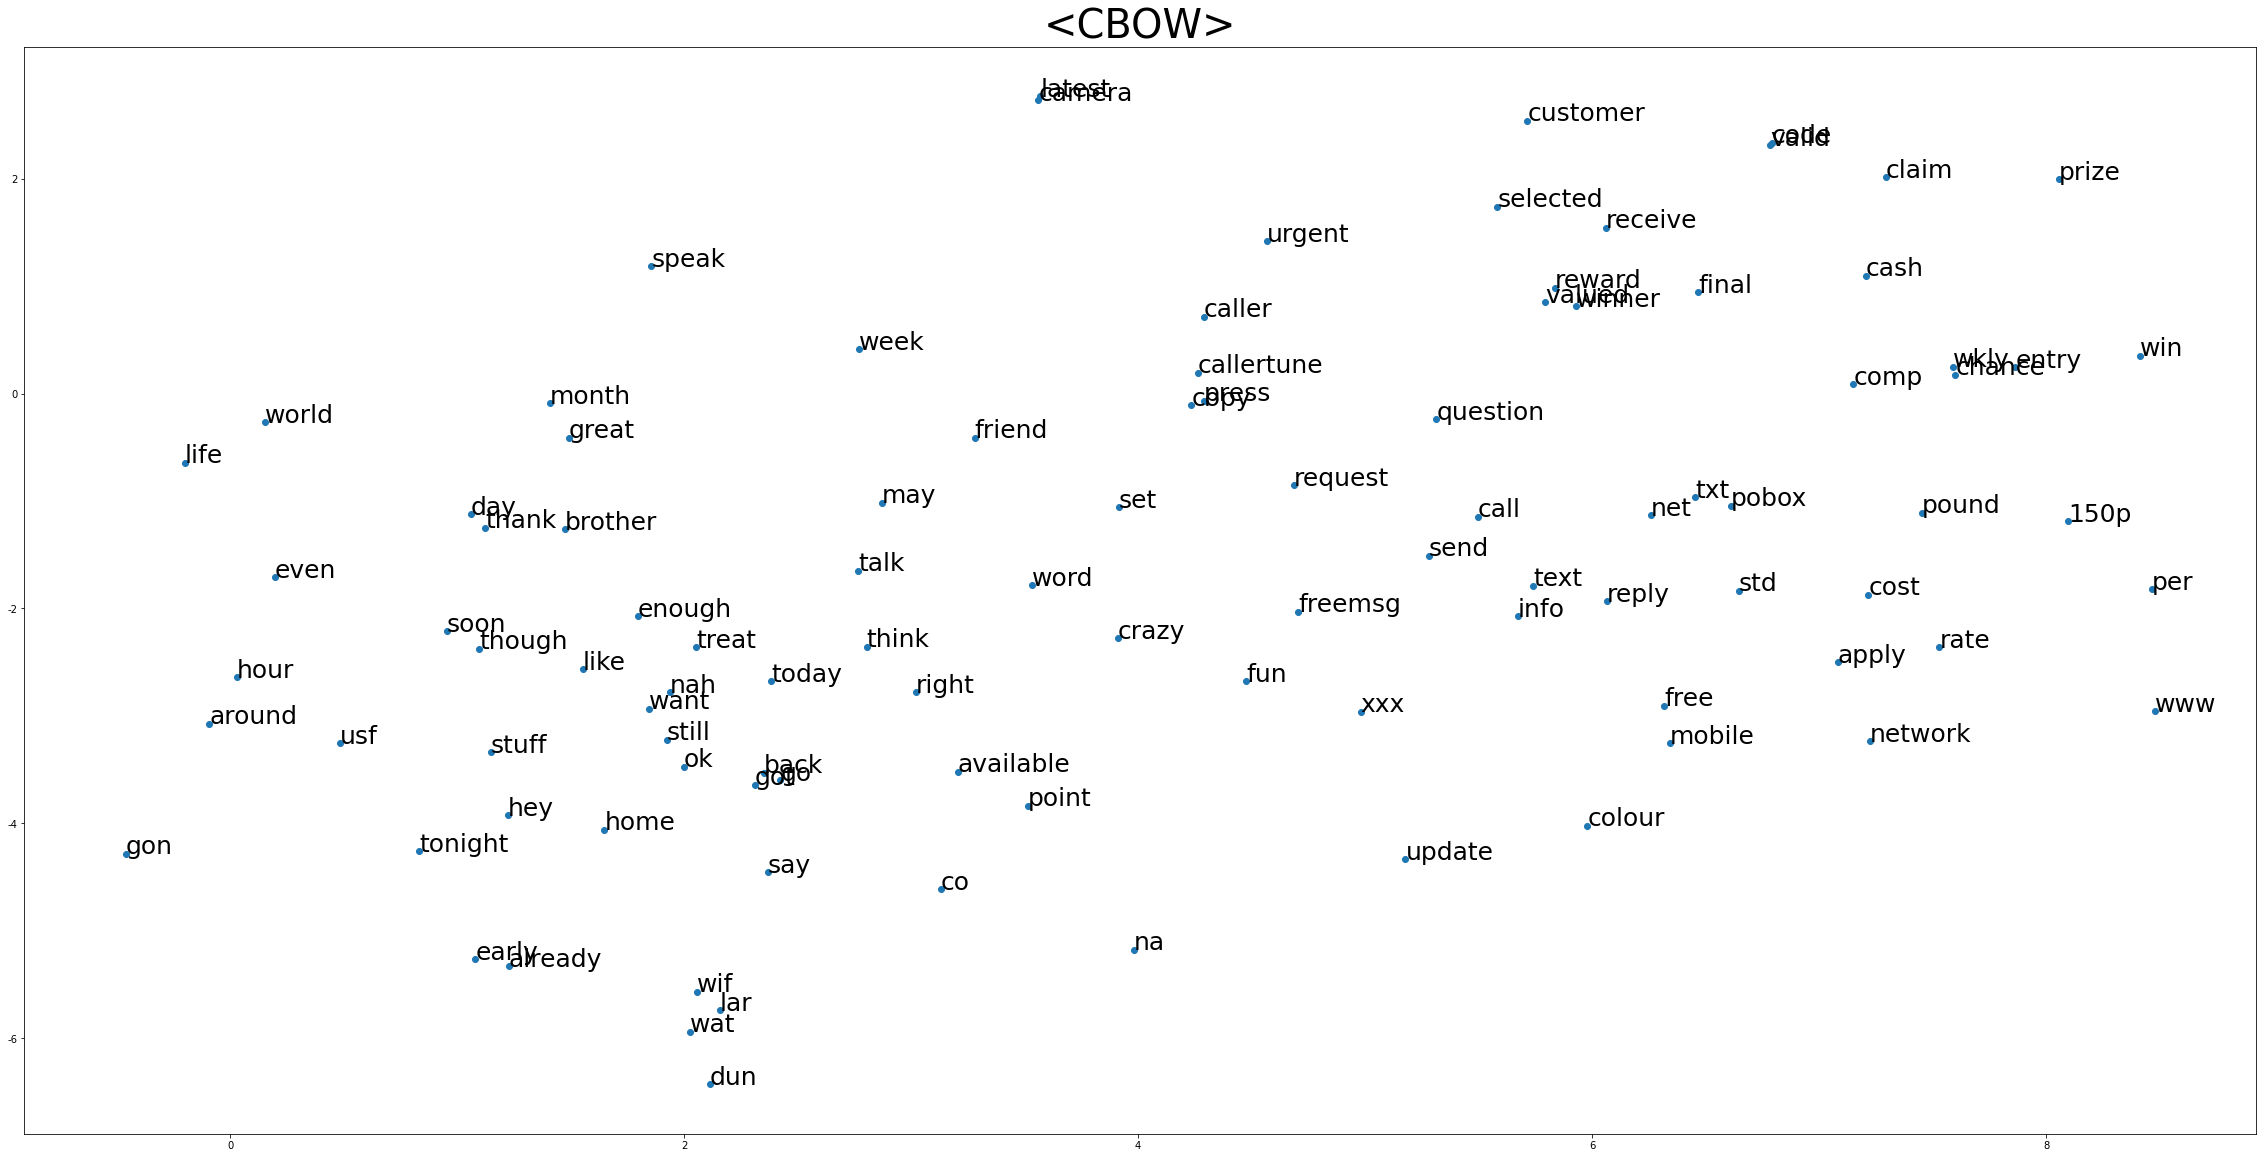

In [31]:
plot_model(Cbow, title="CBOW")

CBOW도 마찬가지로 good과 유사한 단어들 상위 5개를 추출한 결과, morning, hope, another, morning, moment 등 good과 함께 쓰이거나 뜻이 유사한 긍정적인 단어들을 얻을 수 있었다. 또한 임베딩 결과를 시각화한 결과, (send, call), (caller, callertune), (free, mobile)와 주로 같이 의미가 유사하거나 함께 등장하는 단어가 가깝게 위치하는 것을 확인할 수 있었다.

### 3) Fast Text

In [24]:
%time fastText = FastText(size=30, window=5, min_count=10, sentences=corpus, workers=8, iter=100)

CPU times: user 33.2 s, sys: 376 ms, total: 33.6 s
Wall time: 18 s


In [25]:
fastText.most_similar("good", topn =5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('love', 0.6678146123886108),
 ('hope', 0.6644871830940247),
 ('sleep', 0.6441856622695923),
 ('train', 0.6398026347160339),
 ('thank', 0.6317400932312012)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


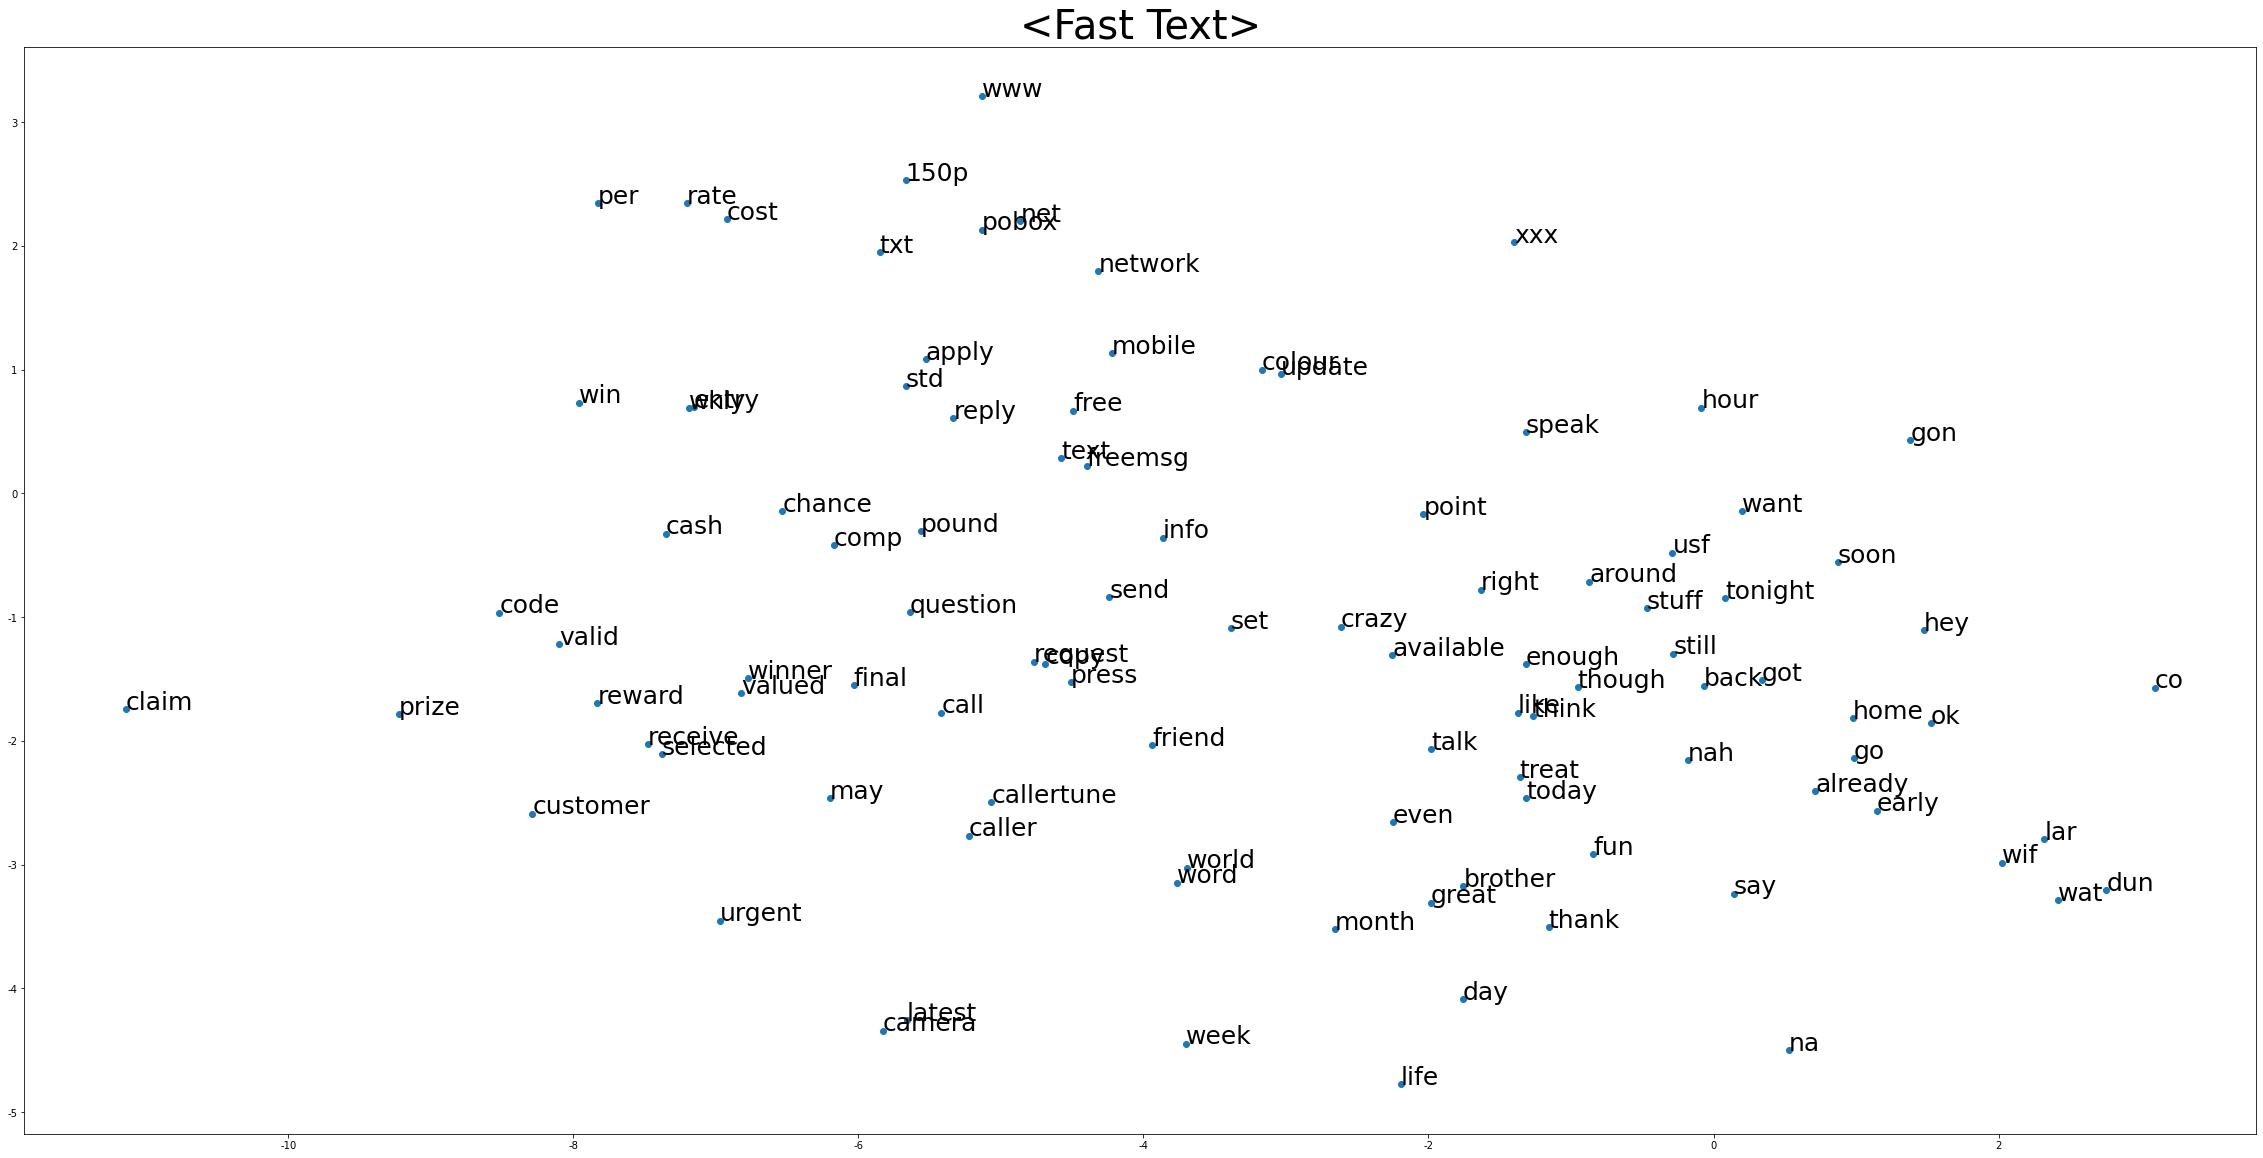

In [32]:
plot_model(fastText, "Fast Text")

good과 유사한 단어들 상위 5개를 추출한 결과, love, hope, sleep, train, thank 등 good과 함께 쓰이거나 뜻이 유사한 긍정적인 단어들을 얻을 수 있었다. 다만 앞의 두 모델과는 결과 값이 조금 차이가 있었다. 또한 임베딩 결과를 시각화한 결과, 의미가 유사한 경우와 더불어 (already, early)와 같이 발음이 유사한 경우도 가깝게 나타나는 것을 확인할 수 있었다. 정성적으로 볼 때, FastText의 성능이 가장 좋은 것 같았다.

### 4) GloVe

In [26]:
!pip install glove_python_binary

     |████████████████████████████████| 952kB 7.5MB/s 


In [27]:
from glove import Corpus, Glove
corp = Corpus() 
corp.fit(corpus, window=5)
glove = Glove(no_components=30, learning_rate=0.01)
glove.fit(corp.matrix, epochs=100, no_threads=8)
glove.add_dictionary(corp.dictionary)

In [28]:
glove.most_similar("good")

[('morning', 0.9246898735304722),
 ('hope', 0.8134511492091467),
 ('night', 0.7913380114273348),
 ('afternoon', 0.765003866946095)]

## 본인이 도출해낸 해석을 적어주세요!

- 유사도, Wordcloud, 이진 분류 모델, Plot 뭐든 상관없으니 분명하고 인상적인 해석을 적어주시면 됩니다.

### 1) Ham과 Spam에서 자주 등장하는 단어 분석

In [33]:
ham = spam[spam.v1=="ham"]
ham

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
5565,ham,Huh y lei...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [46]:
spam_only = spam[spam.v1=="spam"]
spam_only

,v1,v2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


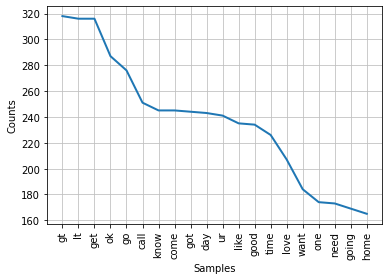

In [49]:
ham_corpus = make_corpus(df = ham, tokenizer = 'word', stopWords = eng_stops, pos_tagging = False)
ham_corpus_flatten = [element for array in ham_corpus for element in array]
# print(corpus_flatten)
from nltk import Text
from matplotlib import pyplot as plt
text = Text(ham_corpus_flatten)
text.plot(20)
plt.show()

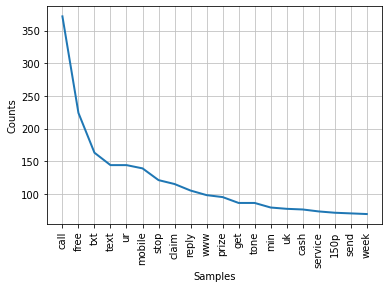

In [50]:
spam_only_corpus = make_corpus(df = spam_only, tokenizer = 'word', stopWords = eng_stops, pos_tagging = False)
spam_only_corpus_flatten = [element for array in spam_only_corpus for element in array]
# print(corpus_flatten)
from nltk import Text
from matplotlib import pyplot as plt
text = Text(spam_only_corpus_flatten)
text.plot(20)
plt.show()

Ham의 경우 get, come, know와 같이 일상적으로 자주 쓰이는 동사들이 높은 빈도로 나타나는 것을 확인할 수 있었다. 반면에 spam의 경우 call, free, mobile과 같이 판매를 유도하는 단어들이 자주 등장하는 것을 확인할 수 있었다.

### 2) Ham으로 라벨링된 텍스만을 가지고 임베딩 진행하기
spam의 경우 문법에 맞지 않는 문장이나, 단어들을 많이 가지고 있기 때문에 일상어를 담고 있는 ham만을 이용하여 분석을 하면 의미있는 결과를 얻어낼 수 있으리라 예상하였다.

CPU times: user 21.3 s, sys: 198 ms, total: 21.5 s
Wall time: 11.9 s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


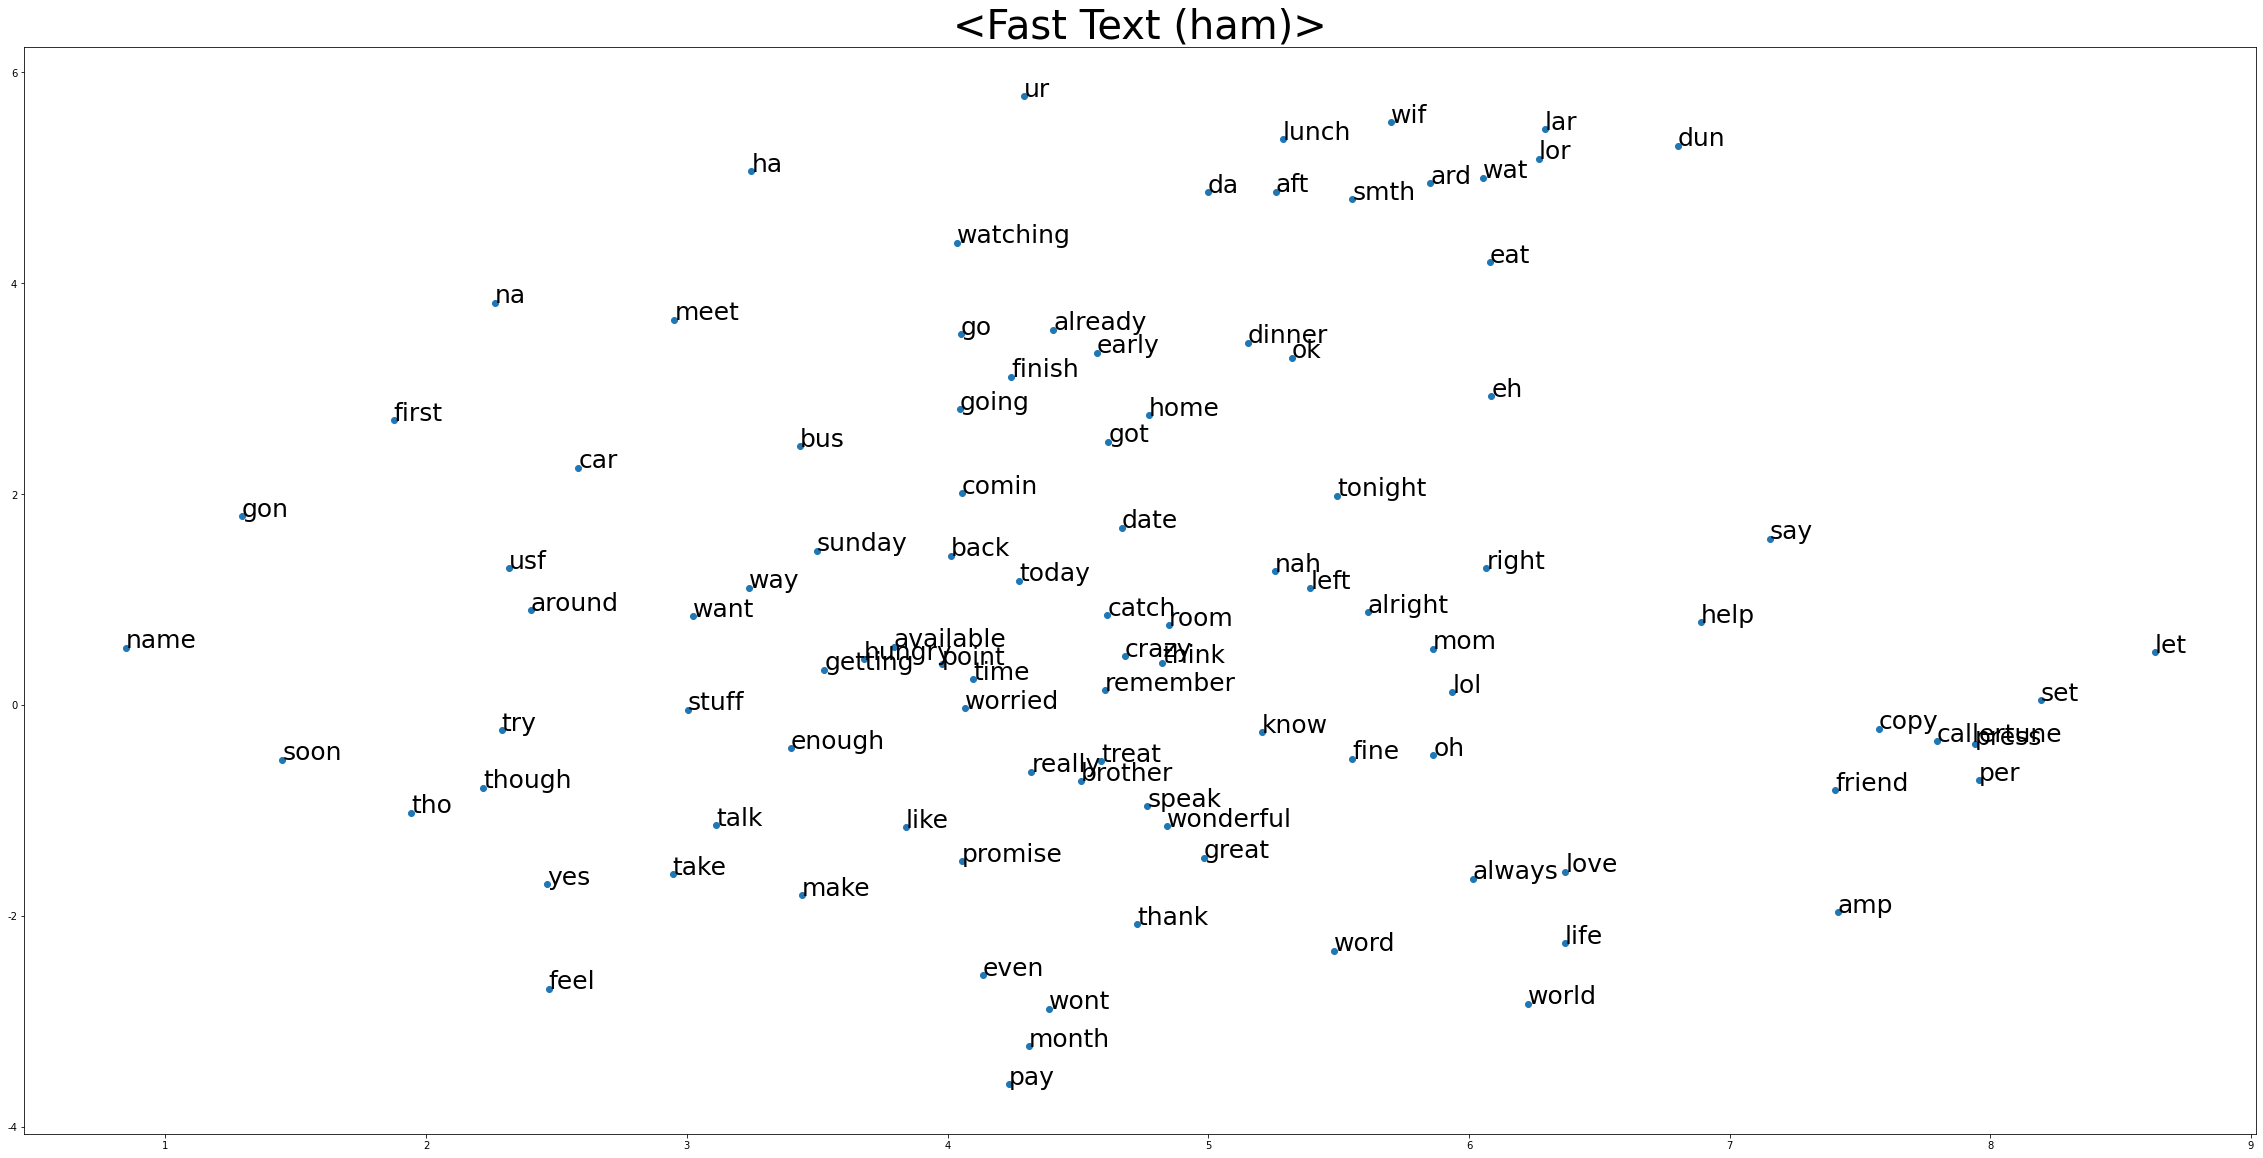

In [38]:
%time ham_fastText = FastText(size=30, window=5, min_count=10, sentences=ham_corpus, workers=8, iter=100)
plot_model(ham_fastText, "Fast Text (ham)")

전반적으로 가까운 단어들끼리 클러스터가 잘 이뤄지는 것을 볼 수 있었다. 그러나 일상생활에서는 약어를 많이 사용하다보니 토종 한국인이 이해하기 어려워 분석에 어려움을 느꼈다.

### 3) 품사를 태깅하여 임베딩하기

CPU times: user 29.8 s, sys: 202 ms, total: 30 s
Wall time: 16.2 s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


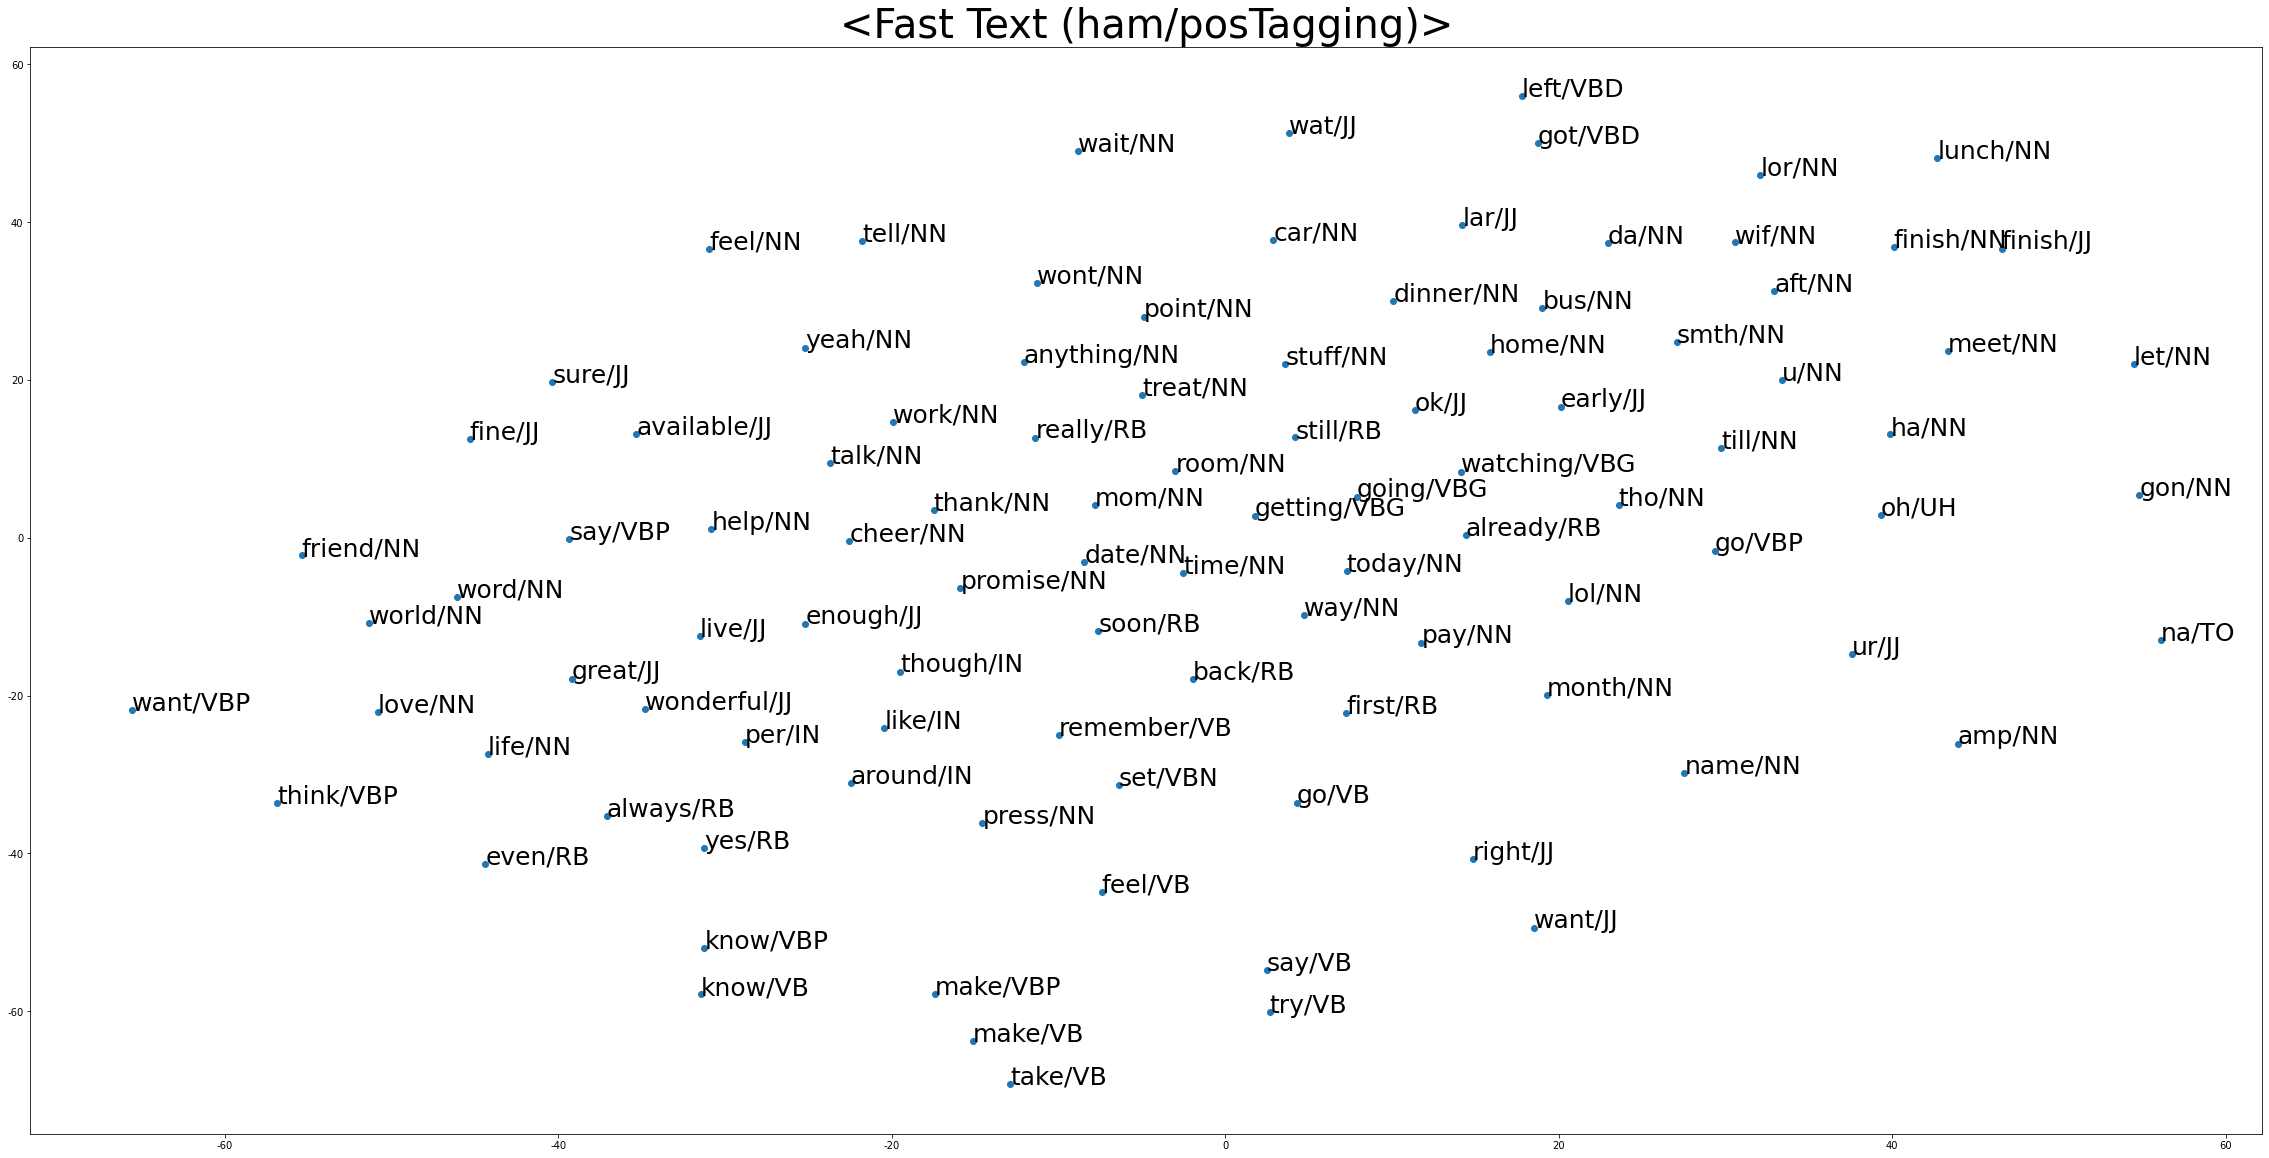

In [45]:
ham_pos_corpus = make_corpus(df = ham, tokenizer = 'word', stopWords = eng_stops, pos_tagging = True)
%time ham_pos_fastText = FastText(size=30, window=5, min_count=10, sentences=ham_pos_corpus, workers=8, iter=100)
plot_model(ham_pos_fastText, "Fast Text (ham/posTagging)")

 품사를 태깅한 결과, 단어의 의미나 등장 빈도뿐만 아니라 같은 품사끼리 가까이 위치하는 등 단어의 속성을 반영한 임베딩이 가능할 것 같다.

